In [1]:
import Bio.SeqIO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seq = list(Bio.SeqIO.parse("salmonella-enterica-variant.reads.fna","fasta"))
# seq = list(Bio.SeqIO.parse("test.fna","fasta"))

In [3]:
ker_length = 30
sequence_hash_first = {}

print('Starting to read the file: {}'.format("salmonella-enterica-variant.reads.fna"))
for current_sequence in seq:
    if int(current_sequence.id) % 100000 == 0:
        print(current_sequence.id, end=' ')
    for i in range(250-ker_length):
        if current_sequence.seq[i:i+ker_length] not in sequence_hash_first:
            sequence_hash_first[ current_sequence.seq[i:i+ker_length] ] = 0
        sequence_hash_first[ current_sequence.seq[i:i+ker_length] ] += 1



Starting to read the file: salmonella-enterica-variant.reads.fna
0 100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000 1900000 

(array([3.9338222e+07, 6.6010000e+04, 4.2060000e+03, 2.6170000e+03,
        7.8820000e+03, 7.1400000e+02, 3.0000000e+00, 6.0000000e+00,
        3.0000000e+00, 3.0000000e+00]),
 array([  1. ,  66.6, 132.2, 197.8, 263.4, 329. , 394.6, 460.2, 525.8,
        591.4, 657. ]),
 <BarContainer object of 10 artists>)

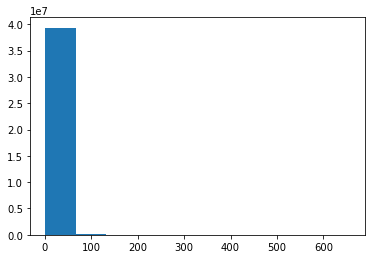

In [4]:
plt.hist(sequence_hash_first.values())

In [7]:
seq = list(Bio.SeqIO.parse("salmonella-enterica.reads.fna","fasta"))
# seq = list(Bio.SeqIO.parse("test_with_mutation.fna","fasta"))
sequence_hash_second = {}
print('Starting to read the file: {}'.format("salmonella-enterica.reads.fna"))
for current_sequence in seq:
    if int(current_sequence.id) % 100000 == 0:
        print(current_sequence.id, end=' ')
    for i in range(250-ker_length):
        if current_sequence.seq[i:i+ker_length] not in sequence_hash_second:
            sequence_hash_second[ str(current_sequence.seq[i:i+ker_length]) ] = 0
        sequence_hash_second[ str(current_sequence.seq[i:i+ker_length]) ] += 1
        # print(current_sequence.seq[i:i+ker_length])


Starting to read the file: salmonella-enterica.reads.fna
0 100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000 1900000 

(array([3.9334448e+07, 6.5349000e+04, 4.0820000e+03, 2.1660000e+03,
        8.4150000e+03, 5.3900000e+02, 2.0000000e+00, 4.0000000e+00,
        2.0000000e+00, 4.0000000e+00]),
 array([  1.,  67., 133., 199., 265., 331., 397., 463., 529., 595., 661.]),
 <BarContainer object of 10 artists>)

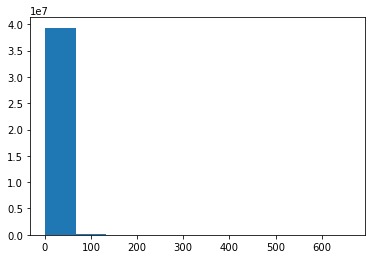

In [8]:
plt.hist(sequence_hash_second.values())

In [ ]:

for chunk, count in sequence_hash_first.items():
    if chunk not in sequence_hash_second:
        print(chunk)


In [ ]:
seq = list(Bio.SeqIO.parse("test_with_mutation.fna","fasta"))
sequence_hash_third = {}

for current_sequence in seq:
    for i in range(250-ker_length):
        if current_sequence.seq[i:i+ker_length] not in sequence_hash_third:
            sequence_hash_third[ str(current_sequence.seq[i:i+ker_length]) ] = 0
        sequence_hash_third[ str(current_sequence.seq[i:i+ker_length]) ] += 1
        # print(current_sequence.seq[i:i+ker_length])


In [18]:
chosen_chunks_1 = {}
print('Starting')
for chunk, count in sequence_hash_first.items():
    if count > 5 and chunk not in sequence_hash_second:
        chosen_chunks_1[chunk] = count
print("Ending")

Starting
Ending


In [13]:
chosen_chunks_2 = {}
print('Starting')
for chunk, count in sequence_hash_second.items():
    if count > 5 and chunk not in sequence_hash_first:
        chosen_chunks_2[chunk] = count
print("Ending")

Starting
Ending


In [14]:
random_chunk_from_first = list(iter(chosen_chunks_1.keys()))[0]
random_chunk_from_second = list(iter(chosen_chunks_2.keys()))[0]

print(random_chunk_from_first)
print(random_chunk_from_second)
print()

print(random_chunk_from_first[15] )
print(random_chunk_from_second[15] )
print()


GGCTGCTCTACACCTAGCTTCTGGGCGAGG
GGCTGCTCTACACCTAGCTTCTGGGCGAGT

A
A



In [24]:
count = 0
for x, val in chosen_chunks_1.items():
    if count == 16 or count == 32 + 16:
        print(x)
    count += 1
print(count)

GCTTCTGGGCGAGGGGACGGGTTGTTAAAC
TTTAACAACCCGTCCCCTCGCCCAGAAGCT
64


In [23]:
count = 0
for x, val in chosen_chunks_2.items():
    if count == 16 or count == 32 + 16:
        print(x)
    count += 1
print(count)

GCTTCTGGGCGAGTTTACGGGTTGTTAAAC
TTTAACAACCCGTAAACTCGCCCAGAAGCT
64
